In [1]:
from model.model import *
from preprocess import *
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
download()
alldat = load()
print("Data Loaded. Proceeding to Preprocessing...")
session = 12

Loading data. Patience, padawan ...
Data Loaded. Proceeding to Preprocessing...


In [3]:
dfs = preprocess(alldat, verbose = True)
train, test = train_test_split(dfs)

[float64]   	session             	session number, indexed 0 - 38
[object]   	session_type        	session type, train / test
[object]   	mouse_name          	name of the mouse
[float64]   	trial_number        	trial number, indexed 0 to num_trials
[bool]   	go_trial            	true if go_trial, false if no-go trial
[float64]   	gocue               	time of go cue, in ms
[float64]   	response_time       	time of response, in ms
[float64]   	latency             	response time - go cue, in ms
[float64]   	mouse_resp          	mouse response for a given trial
[object]   	wheel_velocity      	velocity of the wheel
[object]   	wheel_acceleration  	acceleration of the wheel (first derivative of velocity)
[float64]   	feedback_onset      	feedback onset (reward or punishment)
[float64]   	feedback_type       	-1 if punish, 0 if none, 1 if reward
[float64]   	contrast_left       	left contrast
[float64]   	contrast_right      	right contrast
[float64]   	contrast_diff       	contrast left - co

In [175]:
train["mean_wheel_vel"]= train["wheel_velocity"].apply(lambda x: np.nanmax(x))
train["mean_wheel_acc"]= train["wheel_acceleration"].apply(lambda x: np.nanmax(x))

/Users/jordanlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/jordanlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [176]:
train["fut_mean_wheel_vel"] = futurify(train["mean_wheel_vel"])
train["fut_mean_wheel_acc"] = futurify(train["mean_wheel_acc"])

/Users/jordanlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/jordanlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [339]:
train["zeros"] = 0

def indexby(x, var = "gocue", version = "wheel_velocity", left = 1, right = 3):
    index = int((np.round(x[var] + 500) / 10))
    return x[version][index - left: index + right]

train["gocue_vel_trial"] = train.apply(lambda x: indexby(x, var = "gocue", version = "wheel_velocity"), axis= 1)
train["gocue_acc_trial"] = train.apply(lambda x: indexby(x, var = "gocue", version = "wheel_acceleration"), axis= 1)

train["stim_vel_trial"] = train.apply(lambda x: indexby(x, var = "zeros", version = "wheel_velocity"), axis= 1)
train["stim_acc_trial"] = train.apply(lambda x: indexby(x, var = "zeros", version = "wheel_acceleration"), axis= 1)

train["rt_vel_trial"] = train.apply(lambda x: indexby(x, var = "response_time", version = "wheel_velocity"), axis= 1)
train["rt_acc_trial"] = train.apply(lambda x: indexby(x, var = "response_time", version = "wheel_acceleration"), axis= 1)

/Users/jordanlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/jordanlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/jordanlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [340]:
train.head()

,session,session_type,mouse_name,trial_number,go_trial,gocue,response_time,latency,mouse_resp,wheel_velocity,...,mean_wheel_acc,fut_mean_wheel_vel,fut_mean_wheel_acc,zeros,gocue_vel_trial,gocue_acc_trial,stim_vel_trial,stim_acc_trial,rt_vel_trial,rt_acc_trial
0,0.0,train,Cori,0.0,True,1027.216250,1150.203633,122.987383,1.0,"[-1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,4.0,5.0,2.0,0,"[18.0, 17.0, 15.0, 13.0]","[-1.0, -2.0, -2.0, -3.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[10.0, 11.0, 11.0, 13.0]","[1.0, 0.0, 2.0, 0.0]"
1,0.0,train,Cori,1.0,True,874.413814,1399.502868,525.089054,-1.0,"[0.0, -1.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, 1.0...",...,2.0,14.0,2.0,0,"[-6.0, -5.0, -4.0, -4.0]","[1.0, 1.0, 0.0, 1.0]","[0.0, -1.0, 0.0, -1.0]","[-1.0, 1.0, -1.0, 1.0]","[-7.0, -7.0, -6.0, -5.0]","[0.0, 1.0, 1.0, 0.0]"
2,0.0,train,Cori,2.0,True,825.213029,949.291045,124.078016,1.0,"[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0...",...,2.0,7.0,3.0,0,"[6.0, 6.0, 8.0, 9.0]","[0.0, 2.0, 1.0, 2.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[9.0, 7.0, 6.0, 6.0]","[-2.0, -1.0, 0.0, -2.0]"
3,0.0,train,Cori,3.0,False,761.612015,2266.801672,1505.189657,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",...,3.0,18.0,4.0,0,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, -1.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",[],[]
4,0.0,train,Cori,4.0,True,662.010427,816.775837,154.765410,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0,...",...,4.0,14.0,2.0,0,"[13.0, 14.0, 14.0, 14.0]","[1.0, 0.0, 0.0, -2.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[2.0, 2.0, 2.0, 2.0]","[0.0, 0.0, 0.0, 1.0]"


In [335]:
len(train["wheel_velocity"][0])

250

In [334]:
train["wheel_velocity"] train["gocue"][0]/10

102.72162500970835

In [177]:
train["mean_wheel_acc"]

0        4.0
1        2.0
2        2.0
3        3.0
4        4.0
        ... 
10045    1.0
10046    1.0
10047    1.0
10048    1.0
10049    1.0
Name: mean_wheel_acc, Length: 7814, dtype: float64

In [178]:
train["fut_mean_wheel_acc"]

0        2.0
1        2.0
2        3.0
3        4.0
4        2.0
        ... 
10045    1.0
10046    1.0
10047    1.0
10048    1.0
10049    NaN
Name: fut_mean_wheel_acc, Length: 7814, dtype: float64

(array([ 828.,  869., 1037., 1352., 1775., 1323.,  492.,  109.,   23.,
           6.]),
 array([0.        , 0.10361446, 0.20722892, 0.31084337, 0.41445783,
        0.51807229, 0.62168675, 0.7253012 , 0.82891566, 0.93253012,
        1.03614458]),
 <a list of 10 Patch objects>)

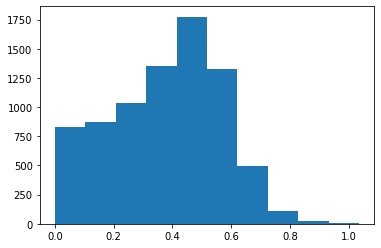

In [135]:
plt.hist(train["mean_wheel_acc"])

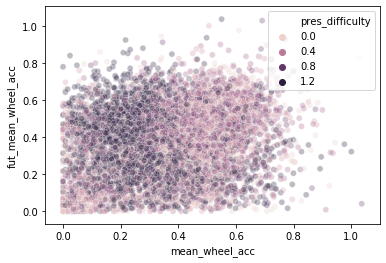

In [142]:
import seaborn as sns

sns.scatterplot(x = "mean_wheel_acc", y = "fut_mean_wheel_acc", data = train, hue = "pres_difficulty", alpha = 0.3)

In [229]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

data_go_trials = train[train["go_trial"]][train["fut_go_trial"]]
data = data_go_trials.dropna()
data["surprise"] = (1500 - data["latency"])/1500 - data["pres_acc"]
X = data[["fut_latency"]].to_numpy()
y = data[["fut_acc"]]
model = LinearRegression()
model.fit(X, y)

/Users/jordanlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/jordanlei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [210]:
data["surprise"]

1       -0.350059
9       -0.118967
12      -0.100366
13      -0.174912
14      -0.097967
           ...   
10044   -0.000078
10045   -0.002271
10046    0.577264
10047    0.000365
10048   -0.001663
Name: surprise, Length: 4569, dtype: float64

In [211]:
data

,session,session_type,mouse_name,trial_number,go_trial,gocue,response_time,latency,mouse_resp,wheel_velocity,...,past_difficulty,fut_go_trial,fut_acc,fut_latency,fut_difficulty,mean_wheel_vel,mean_wheel_acc,fut_mean_wheel_vel,fut_mean_wheel_acc,surprise
1,0.0,train,Cori,1.0,True,874.413814,1399.502868,525.089054,-1.0,"[0.0, -1.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, 1.0...",...,0.00,True,1.0,124.078016,0.50,5.0,2.0,14.0,2.0,-0.350059
9,0.0,train,Cori,9.0,True,1071.216952,1249.667559,178.450607,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",...,1.00,True,1.0,204.115343,0.50,20.0,4.0,17.0,3.0,-0.118967
12,0.0,train,Cori,12.0,True,966.015274,1116.563838,150.548564,1.0,"[-1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",...,1.00,True,1.0,262.368573,0.00,17.0,3.0,21.0,6.0,-0.100366
13,0.0,train,Cori,13.0,True,1070.816945,1333.185519,262.368573,1.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,0.75,True,1.0,146.951250,0.50,21.0,6.0,15.0,4.0,-0.174912
14,0.0,train,Cori,14.0,True,1019.216123,1166.167372,146.951250,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,0.00,True,1.0,87.146236,0.00,15.0,4.0,4.0,2.0,-0.097967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10044,38.0,train,Theiler,337.0,True,594.175591,2094.292183,1500.116592,0.0,"[-1.0, 0.0, -1.0, -1.0, -2.0, -1.0, -2.0, -1.0...",...,0.25,True,0.0,1503.406090,0.25,1.0,1.0,1.0,1.0,-0.000078
10045,38.0,train,Theiler,338.0,True,794.096687,2297.502777,1503.406090,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,0.75,True,0.0,634.103872,0.25,1.0,1.0,1.0,1.0,-0.002271
10046,38.0,train,Theiler,339.0,True,524.699554,1158.803425,634.103872,-1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,0.25,True,0.0,1499.452065,0.25,1.0,1.0,1.0,1.0,0.577264
10047,38.0,train,Theiler,340.0,True,504.256772,2003.708838,1499.452065,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 1.0,...",...,0.25,True,0.0,1502.495204,0.25,1.0,1.0,1.0,1.0,0.000365


In [212]:
def rmse(model, X, y): 
    return np.sum(model.predict(X) - y)**2

In [233]:
model.score(X, y)

0.549021316199997

In [214]:
rmse(model, X, y)

4.089454932665725e-25

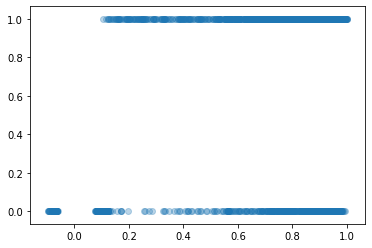

In [225]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(model.predict(X), y, alpha = 0.3)

AttributeError: 'MLPRegressor' object has no attribute 'coef_'